In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm_notebook
from tqdm import tqdm
import pandas as pd
import os
import cv2
import sys
import scipy



%matplotlib inline

Using TensorFlow backend.


In [2]:
bad_path = '../dataset/Bad50x50/27733/'
left_path = '../dataset/LeftHand50x50/27731/'
rigth_path = '../dataset/RightHand50x50/27730/'
test_path = '../dataset/Test189x110/27734/'

In [3]:
dir_path = [bad_path, left_path, rigth_path]

In [4]:

train_img_path = []
for i in dir_path :
    image_in_dir = []
    for j in os.listdir(i):
        if j.split('.')[1] == 'jpg':
            image_in_dir.append(i + j)
    train_img_path.append(image_in_dir)

In [5]:
target_list = [0, 1, 2]

In [6]:
train_data = []
train_target = []
for paths, target in zip(train_img_path, target_list):
    for path in paths:
        train_data.append(imread(path, mode='L'))
        train_target.append(target)
train_data = np.array(train_data)
train_target = np.array(train_target)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


In [7]:
test_img_path = []
for i in os.listdir(test_path):
    if i.split('.')[1] == 'jpg':
        test_img_path.append(test_path + i)

In [8]:
test_data = []
for path in test_img_path:
    test_data.append(imread(path, mode='L', ))
test_data = np.array(test_data)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
batch_size, img_rows, img_cols = 64 , 50, 50

In [10]:
input_shape = (img_rows, img_cols, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target)

In [12]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [24]:
datagen_train = ImageDataGenerator(rotation_range=180, zoom_range=0.1)
datagen_train.fit(X_train.reshape(-1, 50, 50, 1))
datagen_test = ImageDataGenerator(rotation_range=180, zoom_range=0.1)
datagen_test.fit(X_test.reshape(-1, 50, 50, 1))

In [25]:
Y_train = np_utils.to_categorical(y_train, 3)
Y_test = np_utils.to_categorical(y_test, 3)

In [43]:
model = Sequential([
    Conv2D(32, (5, 5), input_shape=input_shape, padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2, 2), padding ='same'),
    Conv2D(64, (5, 5), input_shape=input_shape, padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2, 2), padding = 'same'),
    Flatten(),
    Dense(1024),
    Activation('relu'),
    Dropout(0.5),
    Dense(3),
    Activation('softmax')
])

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
res = model.fit_generator(
    datagen_train.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=len(X_train) / 32,
    validation_data=datagen_test.flow(X_test, Y_test, batch_size=32),
    validation_steps = len(X_test) / 32,
    epochs=10, 
    verbose=1)

Epoch 1/10
53/52 [==============================] - 23s 433ms/step - loss: 0.7912 - acc: 0.5750 - val_loss: 0.5716 - val_acc: 0.6470
Epoch 2/10
53/52 [==============================] - 19s 352ms/step - loss: 0.5577 - acc: 0.6794 - val_loss: 0.4503 - val_acc: 0.8244
Epoch 3/10
53/52 [==============================] - 18s 340ms/step - loss: 0.4145 - acc: 0.8133 - val_loss: 0.3050 - val_acc: 0.8835
Epoch 4/10
53/52 [==============================] - 18s 339ms/step - loss: 0.2779 - acc: 0.8773 - val_loss: 0.1851 - val_acc: 0.9391
Epoch 5/10
53/52 [==============================] - 19s 352ms/step - loss: 0.1978 - acc: 0.9248 - val_loss: 0.1416 - val_acc: 0.9498
Epoch 6/10
53/52 [==============================] - 18s 345ms/step - loss: 0.1484 - acc: 0.9493 - val_loss: 0.0874 - val_acc: 0.9749
Epoch 7/10
53/52 [==============================] - 18s 346ms/step - loss: 0.1309 - acc: 0.9522 - val_loss: 0.1105 - val_acc: 0.9552
Epoch 8/10
53/52 [==============================] - 18s 348ms/step - 

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

In [34]:
model.history.history

{'val_loss': [0.5114211002131089,
  0.4867220058449708,
  0.3403379436462156,
  0.19079013713585433,
  0.16779266420658345,
  0.14228154766944148,
  0.11434556453031451,
  0.07300016548364394,
  0.058534814919408505,
  0.05807809141134062,
  0.047557256127771085,
  0.08153331926005715,
  0.06435617593561022,
  0.04122232868900275,
  0.04692538380522721,
  0.05366812408050542,
  0.033603871059286874,
  0.016930167498167163,
  0.02301511490437132,
  0.03261284998828365,
  0.024011112088637966,
  0.02569052480882214,
  0.04805390347850152,
  0.015866096528734358,
  0.016323704319241655,
  0.00974628445442005,
  0.007959235421491212,
  0.013642749881290907,
  0.009620198831012252,
  0.013331649828314996,
  0.011164441920055817,
  0.008802309922713747],
 'val_acc': [0.7401433685347171,
  0.7939068102494791,
  0.8727598559899142,
  0.9265232977046761,
  0.9301075270953572,
  0.9534050172802367,
  0.9587813620071685,
  0.974910394265233,
  0.9784946230150038,
  0.978494623655914,
  0.97849462

In [35]:
df = pd.DataFrame(model.history.history)

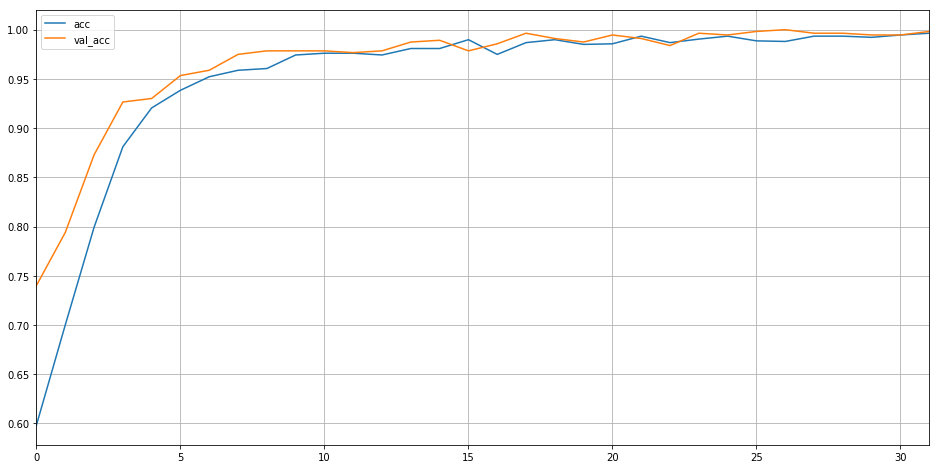

In [36]:
df[['acc', 'val_acc']].plot(figsize=(16, 8))
plt.grid(True);

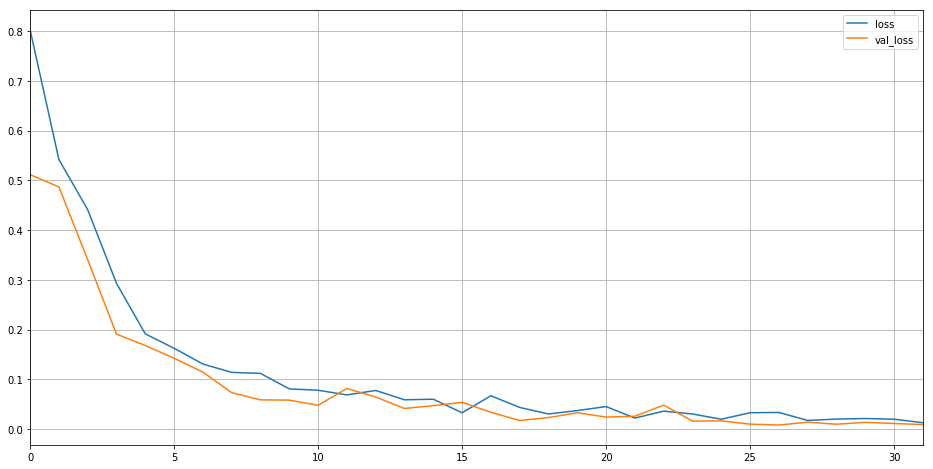

In [37]:
df[['loss', 'val_loss']].plot(figsize=(16, 8))
plt.grid(True);

In [38]:
mod_img = []
value = (15, 15)
l = 0
left = 0
right = 0
rand_img = np.random.randint(0, 30, (50, 50))
for img in tqdm_notebook(test_data):
    blur = cv2.GaussianBlur(img, value, 0)
    _, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, hierarchy = cv2.findContours(thresh1, 
                                                cv2.RETR_TREE,
                                                cv2.CHAIN_APPROX_SIMPLE)
    img_rect = img.copy()
    for i in contours:
        x, y, w, h = cv2.boundingRect(i)
        if (x, y) == (0, 0) or not 30 < w < 50 or not 30 < h < 50:
            continue
        
        x_plus = (50 - w) // 2
        y_plus = (50 - h) // 2
    
        crop_img = np.copy(rand_img)
        crop_img[y_plus:h+y_plus, x_plus:w+x_plus] = img[y:y+h, x:x+w]
        pred = np.round(model.predict(crop_img.reshape(-1,50, 50,1)))
        
        if np.all(pred == np.array([[0., 1., 0.]])):
            img_rect = cv2.rectangle(img_rect, (x,y), (x+w,y+h),255,1) 
            img_rect = cv2.putText(img_rect.copy(), 
                                        'left', 
                                        (x, y-1),
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.4,255)
            left += 1
        if np.all(pred == np.array([[0., 0., 1.]])):
            img_rect = cv2.rectangle(img_rect, (x,y), (x+w,y+h),255,1)
            img_rect = cv2.putText(img_rect.copy(), 
                                        'right', 
                                        (x,y-1),
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.4,255)
            right += 1 
                
    
    mod_img.append(img_rect)
    l += 1
print('\nTotal number of img: {}'.format(l))
print('Number of left hands: {}'.format(left))
print('Number of right hands: {}'.format(right))



Total number of img: 934
Number of left hands: 441
Number of right hands: 631


In [39]:
name_dir = 'updated_img'

In [40]:
os.mkdir(name_dir)

In [41]:
os.chdir(name_dir)

In [42]:
for i in tqdm_notebook(range(len(mod_img))):
    plt.imsave(str(i)+'.png', mod_img[i], cmap='gray')

In [17]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")